<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day56.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pooling Layers and Dimensionality Reduction

**Introduction to Pooling Layers**

- What are Layers?

  - Used to reduce the dimensions of feature maps while retaining the most important info

  - Help make the network computationlly efficient and robust to variations in the input

  - Types of Pooling

    - Max Pooling

      - Selects the maximum value from each region of the input feature map

      - Captures the strongest activations(features)

    - Average Pooling

      - Computes the average value for each region of the input feature map

      - Provides a more generalized summary of features

**Role of Pooling in Reducing dimensionality**

- Dimensionality Reduction

  - Pooling reduces the special dimensions(height and width)of feature maps results in fewer parameters and faster computations

- Robustness

  - Makes the model invariant to small transitions or distortions in the input image

**Combining Convolution and Pooling Layers**

- Pooling layers typically follow convolutional layers to downsample the feature maps

- This combination helps extract hierarchial features

  - Early layers focus on simple features(EX: Edges)

  - Deeper layers capture complex patterns(EX: objects)

**Objective**
- Implement max pooling and averge pooling layers on feature maps and observe their effects on size and representation

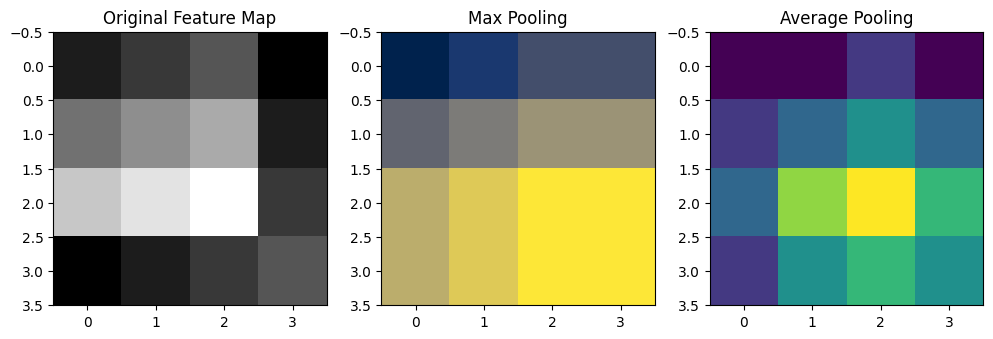

Max Pooling Tensor: 
[[5. 6.]
 [8. 9.]]
Average Pooling Tensor: 
[[3.  2.5]
 [4.  4. ]]
Max Pooling Tensor: 
[[5. 6.]
 [8. 9.]]
Average Pooling Tensor: 
[[3.  2.5]
 [4.  4. ]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter, uniform_filter

# Create a sample feature map
feature_map = np.array([
    [1, 2, 3, 0],
    [4, 5, 6, 1],
    [7, 8, 9, 2],
    [0, 1, 2, 3]
])

# Max Pooling(2x2)
max_pool = maximum_filter(feature_map, size=2, mode='constant')

# Average Pooling(2x2)
avg_pool = uniform_filter(feature_map, size=2, mode='constant')

# Plot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(feature_map, cmap='gray')
axes[0].set_title("Original Feature Map")
axes[1].imshow(max_pool, cmap="cividis")
axes[1].set_title("Max Pooling")
axes[2].imshow(avg_pool, cmap="viridis")
axes[2].set_title("Average Pooling")
plt.show()

import tensorflow as tf

# Create a sample input tensor (1X4x4X1 for batch size, height, width, channels)
input_tensor = tf.constant(feature_map.reshape(1, 4, 4, 1), dtype=tf.float32)

# Max Pooling
max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid")
max_pool_tensor = max_pool(input_tensor)

# Avg Pooling
avg_pool = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="valid")
avg_pool_tensor = avg_pool(input_tensor)

print(f"Max Pooling Tensor: \n{tf.squeeze(max_pool_tensor).numpy()}")
print(f"Average Pooling Tensor: \n{tf.squeeze(avg_pool_tensor).numpy()}")

import torch
import torch.nn as nn

# Create a sample input tensor(batch_size, channels, height, width)
input_tensor = torch.tensor(feature_map, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Max Pooling
max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
max_pool_tensor = max_pool(input_tensor)

# Average Pooling
avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)
avg_pool_tensor = avg_pool(input_tensor)

print(f"Max Pooling Tensor: \n{max_pool_tensor.squeeze().numpy()}")
print(f"Average Pooling Tensor: \n{avg_pool_tensor.squeeze().numpy()}")

# TensorFlow example
model_tf = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 32)),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.AveragePooling2D((2, 2))
])

# PyTorch example
class SimpleCNN(torch.nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool2 = nn.AvgPool2d(2, 2)
    def forward(self, x):
      x = torch.relu(self.conv1(x))
      x = self.pool(x)
      x = torch.relu(self.conv2(x))
      x = self.pool2(x)
      return x